<a href="https://colab.research.google.com/github/Afsar1201/Netflix-data-analytics/blob/main/Netflix_data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NETFLIX data analytics by usiing Python, pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("ggplot")

In [9]:
url = "netflix_titles.csv"
df = pd.read_csv(url)
df.shape

(8807, 12)

In [11]:
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [13]:
df = df.dropna(subset= ["type", "title", "release_year"])
df["country"].fillna("Unknown", inplace= True)
print(df.shape)

(8807, 12)


/tmp/ipython-input-3387153834.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["country"].fillna("Unknown", inplace= True)


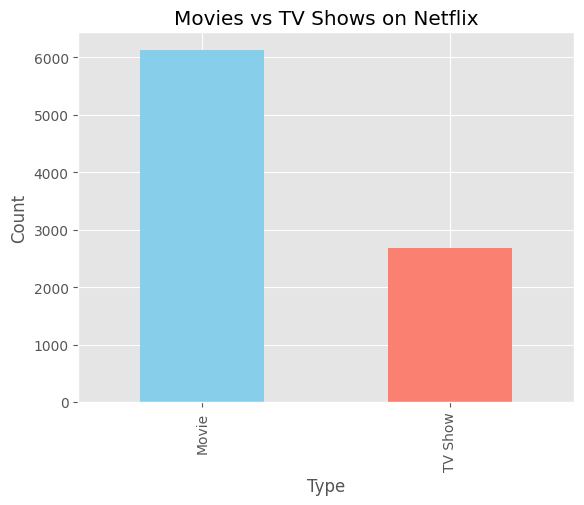

In [15]:
df["type"].value_counts().plot(kind = "bar", color = ["skyblue", "salmon"])
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-3397513096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")


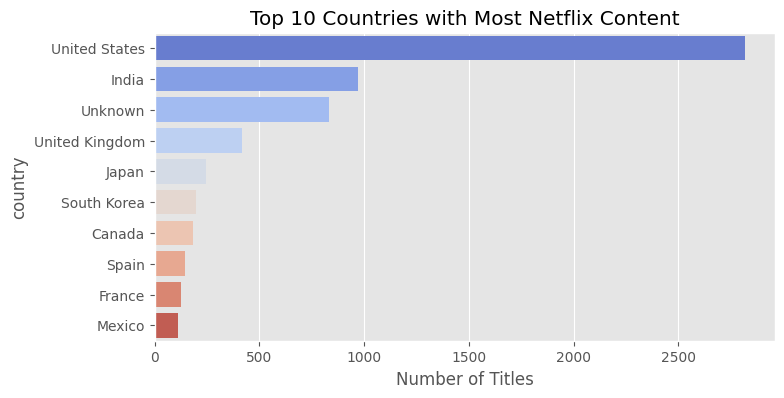

In [16]:
top_countries = df["country"].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.show()

/tmp/ipython-input-1555380019.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["date_added"] = pd.to_datetime(df["date_added"].str.strip(), errors="coerce", infer_datetime_format=True)


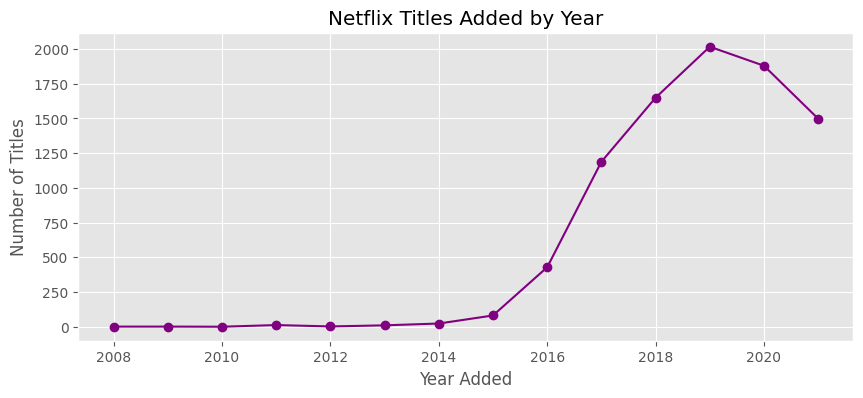

In [20]:
df["country"] = df["country"].fillna("Unknown")

# Convert date column safely (avoids ValueError)
df["date_added"] = pd.to_datetime(df["date_added"].str.strip(), errors="coerce", infer_datetime_format=True)

# Extract year from parsed dates
df["year_added"] = df["date_added"].dt.year

# ---------------- Analyze ----------------
# Count number of titles added per year
content_by_year = df["year_added"].dropna().value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10,4))
plt.plot(content_by_year.index, content_by_year.values, marker="o", color="purple")
plt.title("Netflix Titles Added by Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

/tmp/ipython-input-422664827.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Genre", data=top_genres, palette="mako")


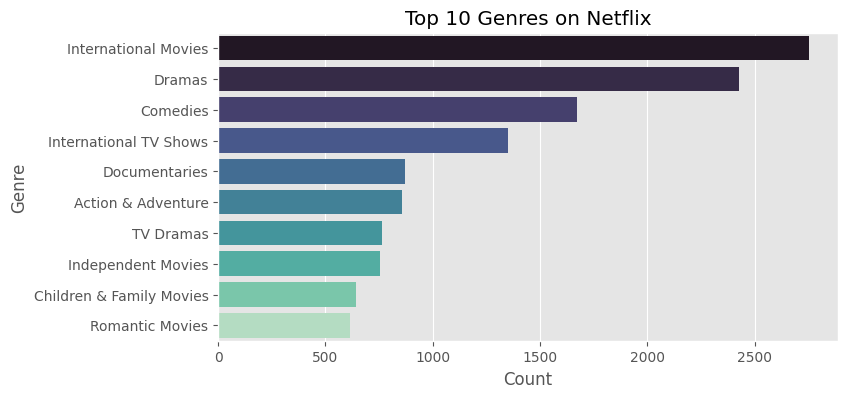

In [21]:
# Split genres and count
from collections import Counter

genres = df["listed_in"].dropna().apply(lambda x: [g.strip() for g in x.split(",")])
genre_counts = Counter([g for sublist in genres for g in sublist])
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=["Genre", "Count"])

plt.figure(figsize=(8,4))
sns.barplot(x="Count", y="Genre", data=top_genres, palette="mako")
plt.title("Top 10 Genres on Netflix")
plt.show()
